In [1]:
import pandas as pd

In [2]:
data = pd.DataFrame()

In [3]:
data["Ns"] = [31, 19, 56, 67, 88, 6, 18, 40, 36, 54, 35, 52, 51, 47, 27, 36, 64, 68, 61, 30]
data["Ni"] = [41, 22, 63, 71, 90, 7, 14, 41, 49, 79, 52, 76, 74, 66, 39, 44, 86, 90, 91, 41]
data["A"] = [40, 20, 60, 80, 90, 15, 20, 40, 40, 60, 40, 70, 49, 50, 36, 40, 50, 50, 60, 30]

In [19]:
data

,Ns,Ni,A
0,31,41,40
1,19,22,20
2,56,63,60
3,67,71,80
4,88,90,90
5,6,7,15
6,18,14,20
7,40,41,40
8,36,49,40
9,54,79,60


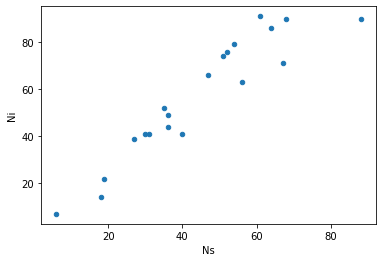

In [20]:
data.plot("Ns", "Ni", "scatter")

In [24]:
import numpy as np
import pandas as pd

def h5store(filename, df, **kwargs):
    store = pd.HDFStore(filename)
    store.put('mydata', df)
    store.get_storer('mydata').attrs.metadata = kwargs
    store.close()

def h5load(store):
    data = store['mydata']
    metadata = store.get_storer('mydata').attrs.metadata
    return data, metadata

In [25]:
metadata = {"zeta": 350., 
            "zeta error": 10. / 350., 
            "nd": 2936, 
            "rhod": 1.304, 
            "unit area graticule": 0.9009,
            "Ns":"Number of spontaneous tracks",
            "Ni":"Number of induced tracks in the detector",
            "Area": "Number of graticules squares",
            "description": ""}

In [26]:
h5store("Miller.h5", data, **metadata)

In [27]:
with pd.HDFStore("Miller.h5") as store:
    data, metadata = h5load(store)

In [11]:
data, metadata

(    Ns  Ni   A
 0   31  41  40
 1   19  22  20
 2   56  63  60
 3   67  71  80
 4   88  90  90
 5    6   7  15
 6   18  14  20
 7   40  41  40
 8   36  49  40
 9   54  79  60
 10  35  52  40
 11  52  76  70
 12  51  74  49
 13  47  66  50
 14  27  39  36
 15  36  44  40
 16  64  86  50
 17  68  90  50
 18  61  91  60
 19  30  41  30,
 {'zeta': 350.0,
  'zeta error': 0.02857142857142857,
  'nd': 2936,
  'rhod': 1.304,
  'unit area graticule': 0.9009,
  'Ns': 'Number of spontaneous tracks',
  'Ni': 'Number of induced tracks in the detector',
  'Area': 'Number of graticules squares',
  'description': ''})

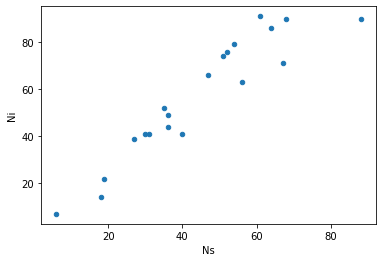

In [18]:
%matplotlib inline
data.plot("Ns", "Ni", "scatter")

In [29]:
data.to_csv("my_sample.csv")